Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las 
variaciones de contraste.


In [77]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

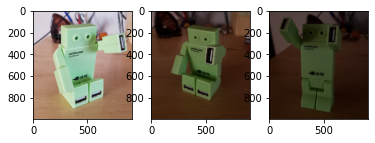

In [78]:
# Ejercicio: extraer los píxeles del tablero (color verde)
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img_color1 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_1.png')
img_color2 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_2.png')
img_color3 = cv.imread(r'C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP1\CoordCrom_3.png')

img1 = cv.cvtColor(img_color1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img_color2,cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img_color3,cv.COLOR_BGR2RGB)

fig = plt.figure()
fig1 = plt.subplot(131)
plt.imshow(img_color1[:,:,::-1])
fig2 = plt.subplot(132)
plt.imshow(img_color2[:,:,::-1])
fig3 = plt.subplot(133)
plt.imshow(img_color3[:,:,::-1])
plt.show()

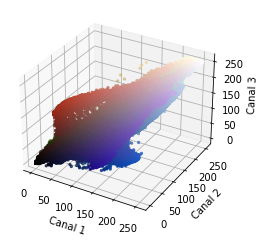

In [79]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r1, g1, b1 = cv.split(img1)
r2, g2, b2 = cv.split(img2)
r3, g3, b3 = cv.split(img3)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_color1.reshape((np.shape(img_color1)[0]*np.shape(img_color1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r1.flatten(), g1.flatten(), b1.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

In [80]:
# Funcion de pasaje a coordenadas cromaticas

def crom(r,g,b):

    n=cv.add(r,g,b)
    rn=cv.divide(255*r,n)
    gn=cv.divide(255*g,n)
    bn=cv.divide(255*b,n)

    
    rn[np.isnan(rn)] = 0
    gn[ np.isnan(gn)] = 0
    rn[np.isnan(rn)] = 0
    img=cv.merge([rn,gn,bn]) 
    #np.clip(img, 0, 255)   # Clip trunca a lo que se le diga (0 a 255)
    img=np.clip(img, 0, 255).astype('uint8') # Hay que castear a 8 bits
    return(n,img)


In [81]:
n1,im1=crom(r1,g1,b1)
n2,im2=crom(r2,g2,b2)
n3,im3=crom(r3,g3,b3)

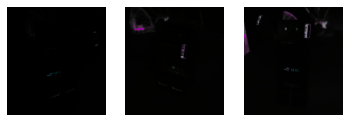

In [82]:
fig = plt.figure()
fig1 = plt.subplot(131)
fig1.imshow(im1)
fig1.axis("off")
fig2 = plt.subplot(132)
fig2.imshow(im2)
fig2.axis("off")
fig3 = plt.subplot(133)
fig3.imshow(im3)
fig3.axis("off")
plt.show()